In [5]:
#Basic Packages
import pandas as pd
import numpy as np
from pandas import datetime
import datetime as dt

#Visualization Package
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('file:///C:/Users/RIKKI/Desktop/Notes/Datasets%20for%20Python//Rose.csv',squeeze=True,parse_dates=True)

In [3]:
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
YearMonth    187 non-null object
Rose         185 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [193]:
df.duplicated().sum()

89

In [11]:
df.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [12]:
df[df['Rose'].isna()]

,YearMonth,Rose
174,1994-07,NaN
175,1994-08,NaN


In [13]:
df.interpolate(inplace=True)

In [14]:
df[df['Rose'].isna()]

,YearMonth,Rose


In [15]:
df['Date']=pd.date_range(start='1980-01',end='1995-08',freq='M')

In [16]:
df.head()

,YearMonth,Rose,Date
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [17]:
df.drop(['YearMonth'],axis=1,inplace=True)

In [18]:
df.info()

df.set_index('Date',inplace=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
Rose    187 non-null float64
Date    187 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Text(0, 0.5, 'Rose')

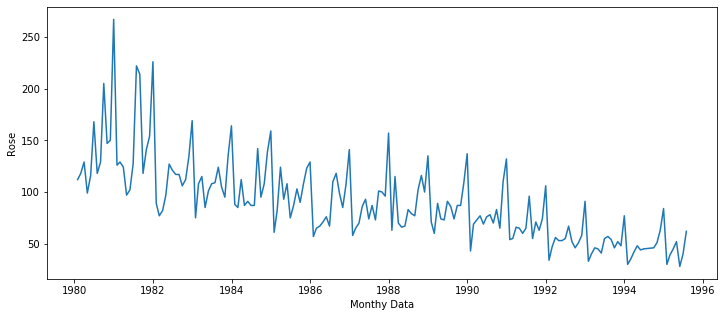

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df['Rose'])
plt.xlabel('Monthy Data')
plt.ylabel('Rose')


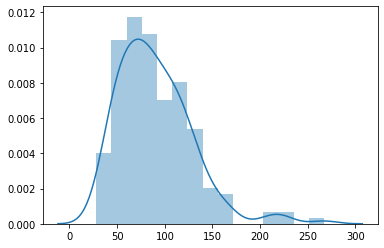

In [20]:
sns.distplot(df)

Text(0.5, 0, 'Year')

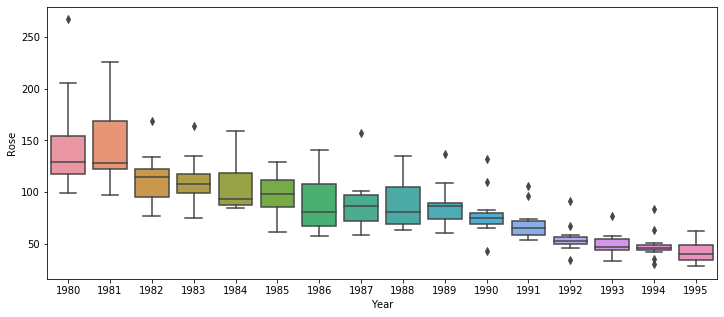

In [21]:
plt.figure(figsize=(12,5))
sns.boxplot(df.index.year,df['Rose'])
plt.xlabel('Year')

Text(0.5, 0, 'Year')

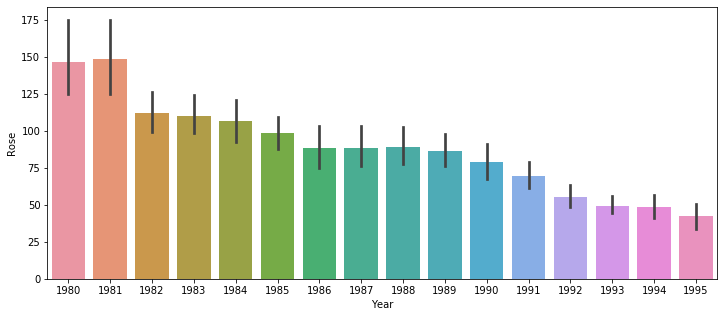

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(df.index.year,df['Rose'])
plt.xlabel('Year')

Text(0.5, 0, 'Months')

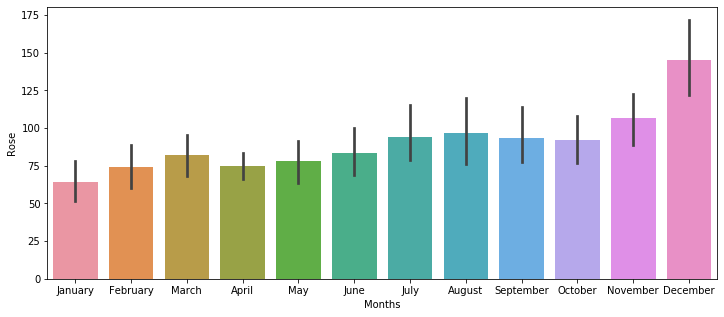

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(df.index.month_name(),df['Rose'])
plt.xlabel('Months')

Text(0.5, 0, 'Months')

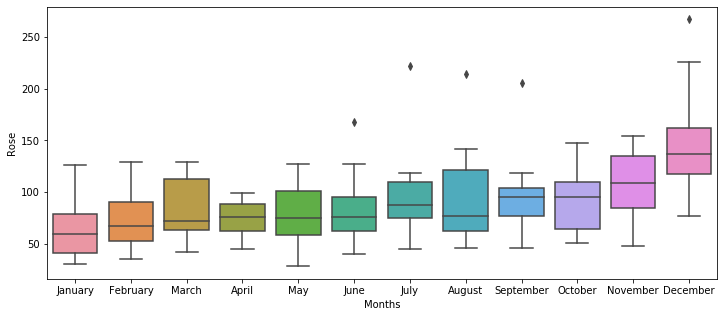

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(df.index.month_name(),df['Rose'])
plt.xlabel('Months')

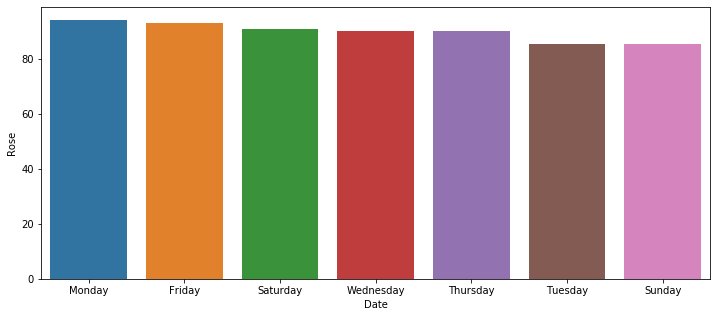

In [195]:
#Monday registers highest average sales of beer throughout the whole week.
Tot_mean=df.groupby(df.index.day_name()).mean().reset_index()
Tot_mean=Tot_mean.sort_values(by='Rose',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_mean['Date'],Tot_mean['Rose'])

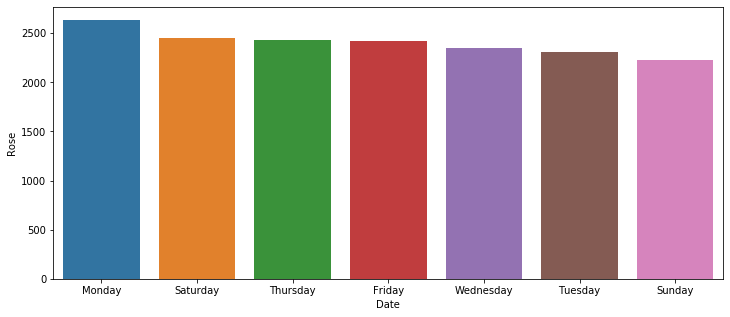

In [196]:
#Monday has the highest sales overall
Tot_sum=df.groupby(df.index.day_name()).sum().reset_index()
Tot_sum=Tot_sum.sort_values(by='Rose',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_sum['Date'],Tot_sum['Rose'])

In [27]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Date,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,
1980,99.0,129.000000,267.0,118.0,112.0,118.000000,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.000000,226.0,129.0,126.0,222.000000,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.000000,169.0,77.0,89.0,117.000000,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.000000,164.0,108.0,75.0,109.000000,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.000000,159.0,85.0,88.0,87.000000,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.000000,129.0,82.0,61.0,87.000000,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.000000,141.0,65.0,57.0,110.000000,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.000000,157.0,65.0,58.0,87.000000,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.000000,135.0,115.0,63.0,79.000000,83.0,70.0,67.0,100.0,116.0,102.0


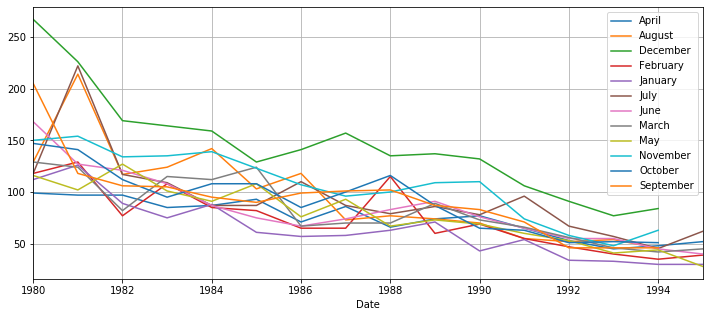

In [28]:
monthly_sales_across_years.plot(figsize=(12,5))
plt.grid()
plt.legend(loc='best');

### Decompostion

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
decompose_addition=seasonal_decompose(df,model='additive',extrapolate_trend='freq')

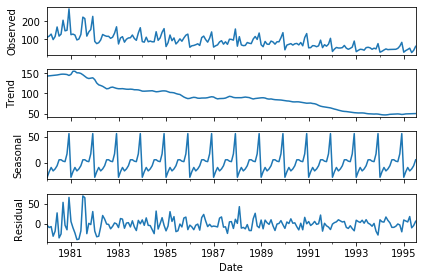

<Figure size 1008x720 with 0 Axes>

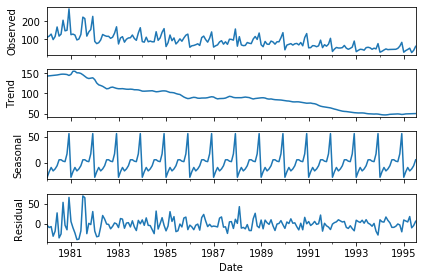

In [55]:
plt.figure(figsize=(14,10))
decompose_addition.plot()

In [56]:
trend_add = decompose_addition.trend
seasonality_add = decompose_addition.seasonal
residual_add = decompose_addition.resid

print('Trend','\n',trend_add.head(5),'\n')
print('Seasonality','\n',seasonality_add.head(5),'\n')
print('Residual','\n',residual_add.head(5),'\n')

Trend 
                   Rose
Date                  
1980-01-31  143.619658
1980-02-29  144.148504
1980-03-31  144.677350
1980-04-30  145.206197
1980-05-31  145.735043 

Seasonality 
                  Rose
Date                 
1980-01-31 -28.058855
1980-02-29 -17.428254
1980-03-31  -9.278095
1980-04-30 -15.844951
1980-05-31 -12.036806 

Residual 
                  Rose
Date                 
1980-01-31  -3.560804
1980-02-29  -8.720251
1980-03-31  -6.399255
1980-04-30 -30.361246
1980-05-31 -17.698237 



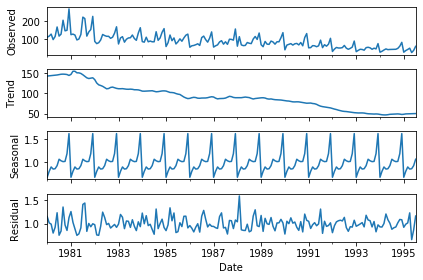

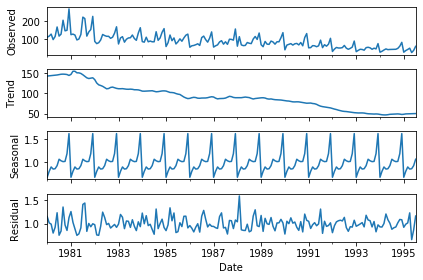

In [57]:
decompose_multi=seasonal_decompose(df,model='multiplicative',extrapolate_trend='freq')

decompose_multi.plot()

In [58]:
trend_mul = decompose_multi.trend
seasonality_mul = decompose_multi.seasonal
residual_mul = decompose_multi.resid

print('Trend','\n',trend_mul.head(5),'\n')
print('Seasonality','\n',seasonality_mul.head(5),'\n')
print('Residual','\n',residual_mul.head(5),'\n')

df.head()

Trend 
                   Rose
Date                  
1980-01-31  143.619658
1980-02-29  144.148504
1980-03-31  144.677350
1980-04-30  145.206197
1980-05-31  145.735043 

Seasonality 
                 Rose
Date                
1980-01-31  0.676904
1980-02-29  0.806254
1980-03-31  0.901399
1980-04-30  0.855717
1980-05-31  0.863276 

Residual 
                 Rose
Date                
1980-01-31  1.152065
1980-02-29  1.015313
1980-03-31  0.989173
1980-04-30  0.796746
1980-05-31  0.922028 



,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


### Train-Test Split

In [119]:
train=df.loc['1980-01-31':'1990-12-31']
test=df.loc['1991-01-31':]

In [120]:
train.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


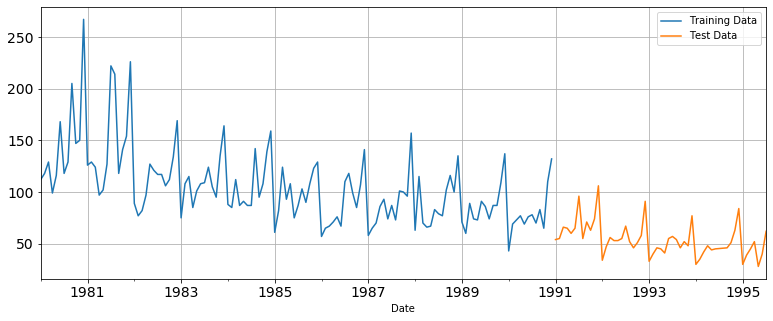

In [121]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Model Building

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
train_time= [ i+1 for i in range(len(train))]

test_time = [i+133 for i in range(len(test))]

print("The train time are ",train_time)
print("")
print("The test time are ",test_time)

The train time are  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]

The test time are  [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [124]:
train_reg=train.copy()
test_reg=test.copy()
train_reg['train_time']=train_time
test_reg['test_time']=test_time

print(train_reg.head())
print(test_reg.head())

             Rose  train_time
Date                         
1980-01-31  112.0           1
1980-02-29  118.0           2
1980-03-31  129.0           3
1980-04-30   99.0           4
1980-05-31  116.0           5
            Rose  test_time
Date                       
1991-01-31  54.0        133
1991-02-28  55.0        134
1991-03-31  66.0        135
1991-04-30  65.0        136
1991-05-31  60.0        137


In [125]:
lr=LinearRegression()

In [126]:
lr=lr.fit(train_reg[['train_time']],train_reg['Rose'])

In [127]:
train_predictions_model1 = lr.predict(train_reg[['train_time']])
train_reg['RegOnTime'] = train_predictions_model1
train_reg.head()

,Rose,train_time,RegOnTime
Date,,,
1980-01-31,112.0,1,137.321144
1980-02-29,118.0,2,136.826766
1980-03-31,129.0,3,136.332388
1980-04-30,99.0,4,135.838010
1980-05-31,116.0,5,135.343632


In [128]:
test_predictions_model1 = lr.predict(test_reg[['test_time']])
test_reg['RegOnTime'] = test_predictions_model1
test_reg.head()

,Rose,test_time,RegOnTime
Date,,,
1991-01-31,54.0,133,72.063266
1991-02-28,55.0,134,71.568888
1991-03-31,66.0,135,71.074511
1991-04-30,65.0,136,70.580133
1991-05-31,60.0,137,70.085755


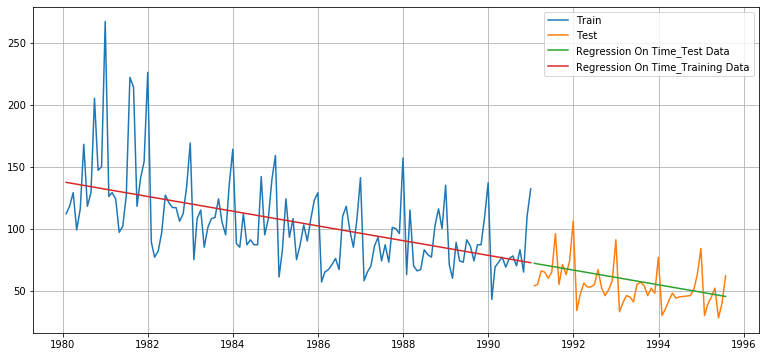

In [129]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(test_reg['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(train_reg['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

### Model Evaluation of Linear Regression Model

In [132]:
## Training Data - RMSE and MAPE

rmse_model1_train = mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Rose'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 30.718 and MAPE is 21.22


In [133]:
## Test Data - RMSE and MAPE

rmse_model1_test = mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 and MAPE is 22.82


In [134]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82


### Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

In [135]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [136]:
## Let us get the last value (or the most recent value) of the training set.
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

Date
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [137]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Date
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

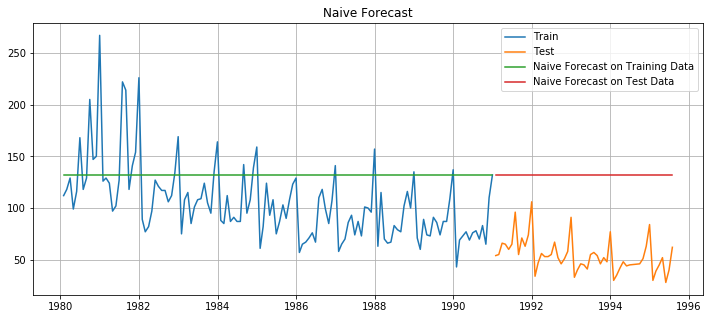

In [138]:
plt.figure(figsize=(12,5))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation of Naive Bayes Mode

In [139]:
## Training Data - RMSE and MAPE

rmse_model2_train = mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 45.064 MAPE is 36.38


In [140]:
## Test Data - RMSE and MAPE

rmse_model2_test = mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719 and MAPE is 145.10


In [141]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10


### Method 3: Simple Average

In [142]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [143]:
## Let us get the last value (or the most recent value) of the training set.
SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

,Rose,mean_forecast
Date,,
1980-01-31,112.0,104.939394
1980-02-29,118.0,104.939394
1980-03-31,129.0,104.939394
1980-04-30,99.0,104.939394
1980-05-31,116.0,104.939394


In [144]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Date,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


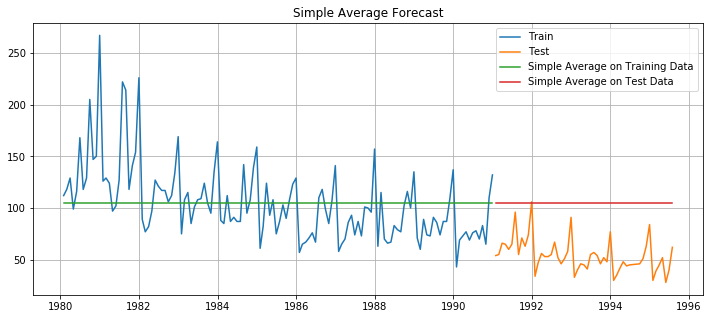

In [145]:
plt.figure(figsize=(12,5))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation of Simple Average

In [146]:
## Training Data - RMSE and MAPE

rmse_model3_train = mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 MAPE is 25.39


In [147]:
## Test Data - RMSE and MAPE

rmse_model3_test = mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461 MAPE is 94.93


In [148]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93


### Method 4: Moving Average(MA)

In [149]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [150]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.50,NaN,NaN
1980-05-31,116.0,107.5,115.50,NaN,NaN
1980-06-30,168.0,142.0,128.00,123.666667,NaN
1980-07-31,118.0,143.0,125.25,124.666667,NaN
1980-08-31,129.0,123.5,132.75,126.500000,NaN
1980-09-30,205.0,167.0,155.00,139.166667,132.666667


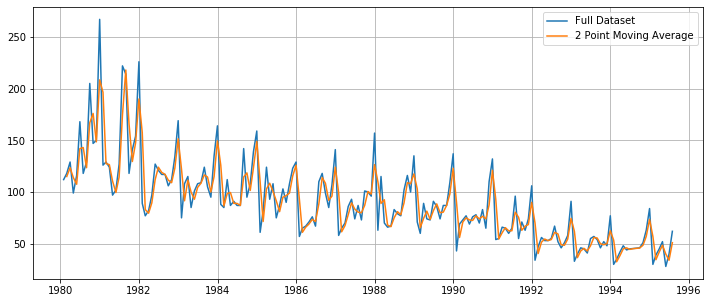

In [151]:
## Plotting on the whole data
plt.figure(figsize=(12,5))
plt.plot(MovingAverage['Rose'], label='Full Dataset')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

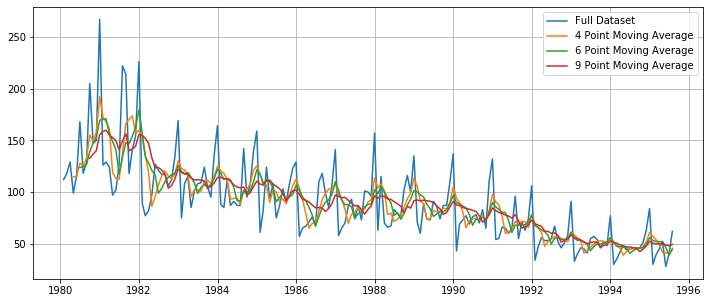

In [57]:
plt.figure(figsize=(12,5))
plt.plot(MovingAverage['Rose'], label='Full Dataset')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [152]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

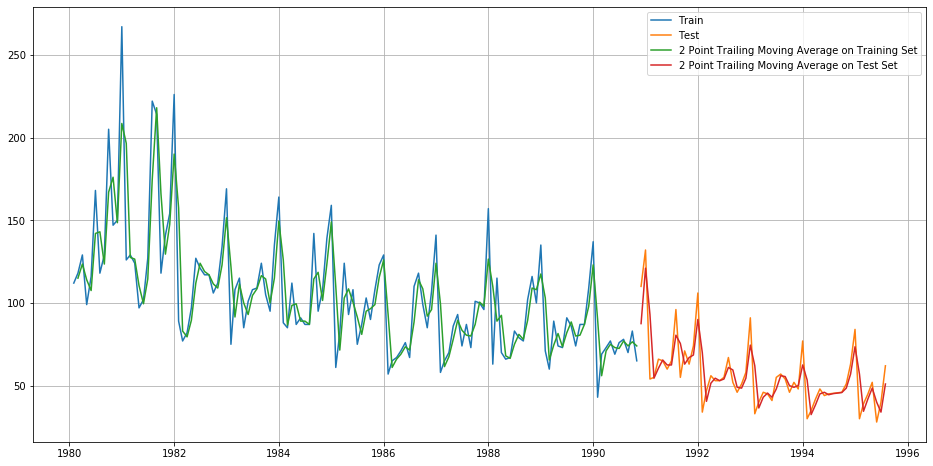

In [153]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.legend(loc='best')
plt.grid()

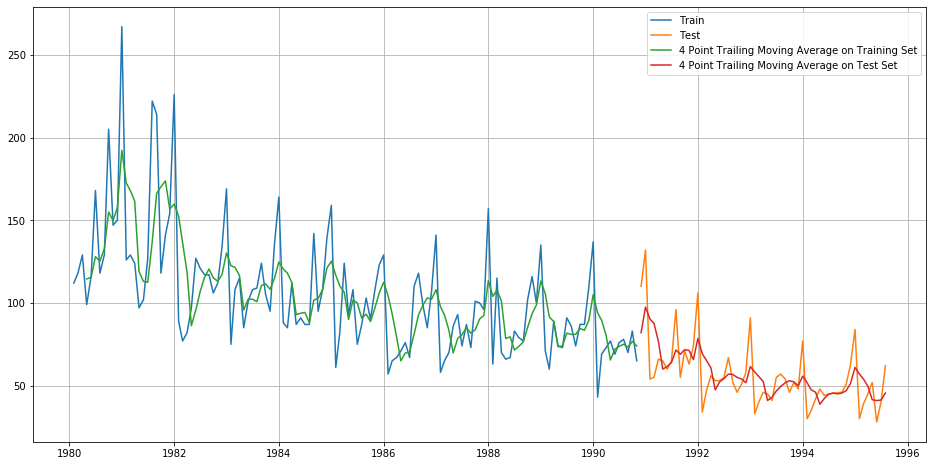

In [154]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.legend(loc='best')
plt.grid()

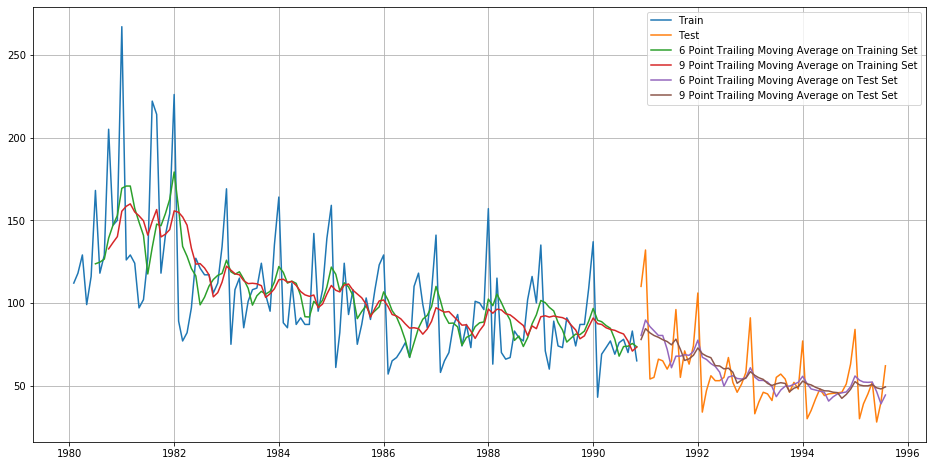

In [155]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc='best')
plt.grid()

In [156]:
trailing_MovingAverage_test.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1990-11-30,110.0,87.5,82.00,80.333333,77.888889
1990-12-31,132.0,121.0,97.50,89.666667,84.444444
1991-01-31,54.0,93.0,90.25,85.666667,81.888889
1991-02-28,55.0,54.5,87.75,83.166667,80.333333
1991-03-31,66.0,60.5,76.75,80.333333,79.222222


### Model Evaluation on moving average

In [157]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'][2:],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'][2:])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'][2:],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'][2:])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'][2:],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'][2:])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 =mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'][2:],squared=False)
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'][2:])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 11.529 and MAPE is 13.54
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 14.451 and MAPE is 19.49
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 14.566 and MAPE is 20.82
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 14.728 and MAPE is 21.01


In [158]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01


### Method 5: Simple Exponential Smoothing

In [159]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [160]:
SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Rose'].astype('double')).fit()

In [161]:
model_SES.params

{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [162]:
#pred = ets.ExponentialSmoothing(series, trend = None, damped = False, seasonal = None).fit()
print('')
print('== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==')
print('')
print('Smoothing Level', np.round(model_SES.params['smoothing_level'], 4))
print('Initial Level', np.round(model_SES.params['initial_level'], 4))
print('')
y_pred = model_SES.forecast(steps = 3)
y_pred = pd.DataFrame(y_pred)
y_pred


== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==

Smoothing Level 0.0987
Initial Level 134.387



,0
1991-01-31,87.104999
1991-02-28,87.104999
1991-03-31,87.104999


In [163]:
y_pred1=model_SES.predict(start=SES_train['Rose'].index[0])
test_forecast=model_SES.forecast(steps=len(SES_test['Rose']))

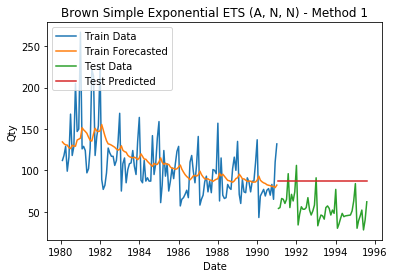

In [164]:
fig1, ax = plt.subplots()
ax.plot(SES_train['Rose'], label = 'Train Data')
ax.plot(y_pred1, label = 'Train Forecasted')
ax.plot(SES_test['Rose'],label='Test Data')
ax.plot(test_forecast,label='Test Predicted')
plt.legend(loc = 'upper left')
plt.title('Brown Simple Exponential ETS (A, N, N) - Method 1')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.show()

In [197]:
## Training Data

rmse_model5_train_1 = mean_squared_error(SES_train['Rose'],y_pred1,squared=False)
mape_model5_train_1 = MAPE(SES_train['Rose'],y_pred1)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 31.501 MAPE is 22.73


In [199]:
## Test Data

rmse_model5_test_1 = mean_squared_error(SES_test['Rose'],test_forecast,squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],test_forecast)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Testing Data,  RMSE is 36.796 MAPE is 63.88


In [201]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=0.0987,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796242,63.88
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",70.572452,120.25
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",16.447465,22.88


### Method 6: Double Exponential Smoothing (Holt's Model)

In [168]:
from statsmodels.tsa.api import ExponentialSmoothing,Holt

In [169]:
DES_train = train.copy()
DES_test = test.copy()

In [170]:
model_DES = Holt(DES_train['Rose'])
model_DES_new = Holt(DES_train['Rose'].astype("double")).fit()

In [171]:
model_DES_new.params

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [172]:
model_DES_new.forecast(steps=len(DES_test)).shape

(55,)

In [173]:
SES_train['Rose'].shape

(132,)

In [174]:
print("Train RMSE is ->",mean_squared_error(DES_train['Rose'],model_DES_new.fittedvalues,squared=False))
print("Train MAPE is ->",MAPE(DES_train['Rose'],model_DES_new.fittedvalues))

Train RMSE is -> 33.074575342441285
Train MAPE is -> 23.99


In [175]:
print("Test RMSE is ->",mean_squared_error(DES_test['Rose'],model_DES_new.forecast(steps=len(DES_test)),squared=False))
print("Test MAPE is ->",MAPE(DES_test['Rose'],model_DES_new.forecast(steps=len(DES_test))))

Test RMSE is -> 70.57245196981661
Test MAPE is -> 120.25


In [176]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [177]:
for i in np.arange(0.3,1,0.01):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test['Rose']))
        
        rmse_model6_train = mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test }, ignore_index=True)

In [178]:
resultsDf_7.sort_values(by='Test RMSE').head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.30,0.3,35.944983,265.567594
8,0.31,0.3,36.047781,274.000835
16,0.32,0.3,36.143944,282.197794
24,0.33,0.3,36.234033,290.154386
32,0.34,0.3,36.318665,297.869262


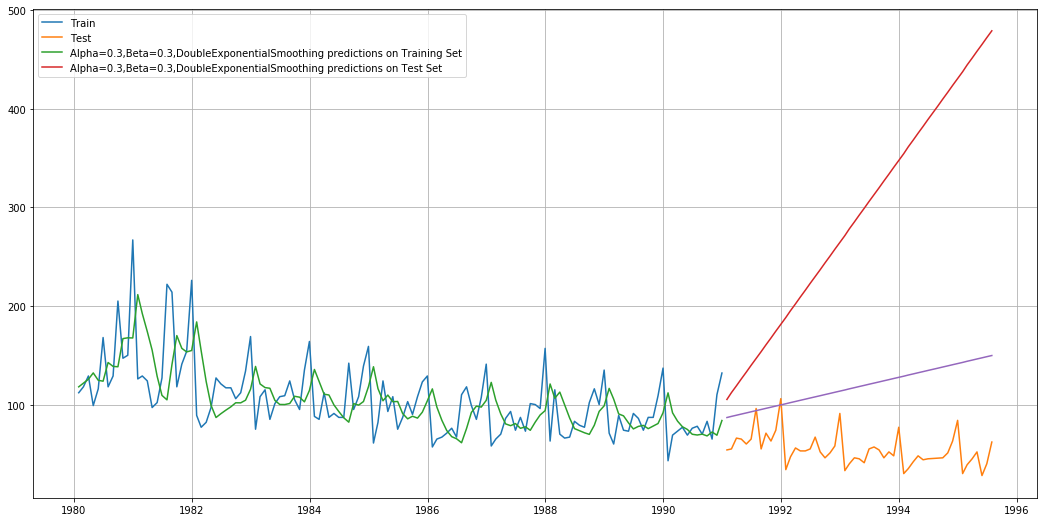

In [179]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(model_DES_new.forecast(steps=len(DES_test)))
plt.legend(loc='best')
plt.grid();

#### Model Evaluation of Double Exponential Smoothing

In [202]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': mean_squared_error(DES_test['Rose'],model_DES_new.forecast(steps=len(DES_test)),squared=False),
                              'Test MAPE':MAPE(DES_test['Rose'],model_DES_new.forecast(steps=len(DES_test)))}
                           ,index=['Alpha=0.1578,Beta=0.1578,DoubleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796242,63.88
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",70.572452,120.25
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",16.447465,22.88


### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters 𝛼 , 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [181]:
TES_train = train.copy()
TES_test = test.copy()

In [182]:
model_TES = ExponentialSmoothing(TES_train['Rose'].astype("double"),trend='additive',seasonal='additive',freq='M')

In [183]:
model_TES_autofit = model_TES.fit()
model_TES_autofit.params

{'smoothing_level': 0.13348630377578782,
 'smoothing_slope': 0.01378547758953572,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.38705525396102,
 'initial_slope': 0.0,
 'initial_seasons': array([ 38.68373526,  51.01808923,  58.99079973,  48.32588272,
         57.11739113,  62.54333192,  72.42693931,  78.50000507,
         74.47678085,  72.54335784,  90.61426088, 132.86448887]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [184]:
## Prediction on the training data
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose,auto_predict
Date,,
1980-01-31,112.0,115.070791
1980-02-29,118.0,126.989585
1980-03-31,129.0,133.740116
1980-04-30,99.0,122.411543
1980-05-31,116.0,128.003934


In [185]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test['Rose']))
TES_test.head()

,Rose,auto_predict
Date,,
1991-01-31,54.0,44.130870
1991-02-28,55.0,56.069843
1991-03-31,66.0,63.647173
1991-04-30,65.0,52.586876
1991-05-31,60.0,60.983004


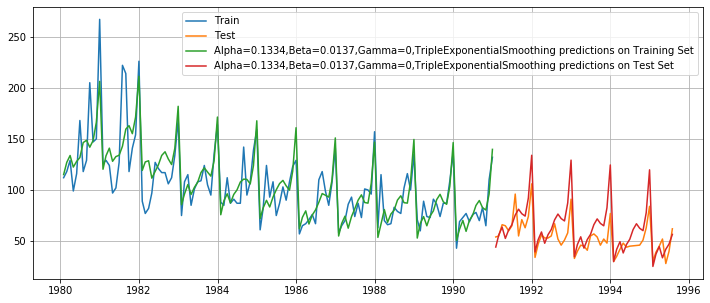

In [205]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(12,5))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_train['auto_predict'], label='Alpha=0.1334,Beta=0.0137,Gamma=0,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.1334,Beta=0.0137,Gamma=0,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [187]:
## Training Data

rmse_model6_train_1 = mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Rose'],TES_train['auto_predict'])
print("For Alpha: 0.13348630377578782,Beta:0.013785 and Gamma:0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.13348630377578782,Beta:0.013785 and Gamma:0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 19.769 MAPE is 13.71


In [188]:
## Test Data

rmse_model6_test_1 = mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha: 0.13348630377578782,Beta:0.013785 and Gamma:0.0,Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.13348630377578782,Beta:0.013785 and Gamma:0.0,Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 16.447 and MAPE is 22.88


In [206]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.1334,Beta=0.0137,Gamma=0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796242,63.88
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",70.572452,120.25
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",16.447465,22.88


##### With iterations

In [190]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [191]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test['Rose']))
        
            rmse_model8_train = mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
        
            rmse_model8_test = mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [207]:
resultsDf_8_2.head()

resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
32,0.1,0.4,0.3,24.790282,16.13,12.078156,16.24
13,0.1,0.2,0.4,23.758573,15.41,12.099563,16.36
22,0.1,0.3,0.3,24.436088,15.87,12.144658,16.33
12,0.1,0.2,0.3,24.168872,15.76,12.206673,16.60
23,0.1,0.3,0.4,24.090662,15.62,12.236610,16.53


In [208]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
32,0.1,0.4,0.3,24.790282,16.13,12.078156,16.24
22,0.1,0.3,0.3,24.436088,15.87,12.144658,16.33
13,0.1,0.2,0.4,23.758573,15.41,12.099563,16.36
23,0.1,0.3,0.4,24.090662,15.62,12.236610,16.53
12,0.1,0.2,0.3,24.168872,15.76,12.206673,16.60


In [211]:
TES_train

,Rose,auto_predict,"(predict, 0.1, 0.1, 0.1)","(predict, 0.1, 0.1, 0.2)","(predict, 0.1, 0.1, 0.30000000000000004)","(predict, 0.1, 0.1, 0.4)","(predict, 0.1, 0.1, 0.5)","(predict, 0.1, 0.1, 0.6)","(predict, 0.1, 0.1, 0.7000000000000001)","(predict, 0.1, 0.1, 0.8)",...,"(predict, 1.0, 1.0, 0.1)","(predict, 1.0, 1.0, 0.2)","(predict, 1.0, 1.0, 0.30000000000000004)","(predict, 1.0, 1.0, 0.4)","(predict, 1.0, 1.0, 0.5)","(predict, 1.0, 1.0, 0.6)","(predict, 1.0, 1.0, 0.7000000000000001)","(predict, 1.0, 1.0, 0.8)","(predict, 1.0, 1.0, 0.9)","(predict, 1.0, 1.0, 1.0)"
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,112.0,115.070791,112.152778,112.152778,112.152778,112.152778,112.152778,112.152778,112.152778,112.152778,...,112.152778,112.152778,112.152778,112.152778,112.152778,112.152778,112.152778,112.152778,112.152778,112.152778
1980-02-29,118.0,126.989585,118.288750,118.288750,118.288750,118.288750,118.288750,118.288750,118.288750,118.288750,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
1980-03-31,129.0,133.740116,129.408238,129.408238,129.408238,129.408238,129.408238,129.408238,129.408238,129.408238,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
1980-04-30,99.0,122.411543,99.511694,99.511694,99.511694,99.511694,99.511694,99.511694,99.511694,99.511694,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
1980-05-31,116.0,128.003934,116.599688,116.599688,116.599688,116.599688,116.599688,116.599688,116.599688,116.599688,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
1980-06-30,168.0,131.731427,168.672885,168.672885,168.672885,168.672885,168.672885,168.672885,168.672885,168.672885,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
1980-07-31,118.0,146.427046,118.732034,118.732034,118.732034,118.732034,118.732034,118.732034,118.732034,118.732034,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
1980-08-31,129.0,148.623834,129.777948,129.777948,129.777948,129.777948,129.777948,129.777948,129.777948,129.777948,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
1980-09-30,205.0,141.863329,205.811491,205.811491,205.811491,205.811491,205.811491,205.811491,205.811491,205.811491,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000


In [218]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][3]],'Test MAPE':[resultsDf_8_2['Test MAPE'][3]]}
                           ,index=['Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796242,63.88
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",70.572452,120.25
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",16.447465,22.88


### Stationarity Check

In [200]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    plt.figure(figsize=(14,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

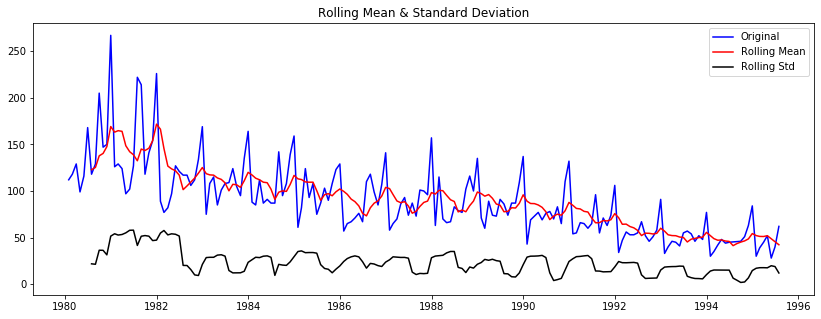

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [201]:
test_stationarity(df['Rose'])

In [ ]:
#We see that at 5% significant level the Time Series is non-stationary.

#Let us take a difference of order 1 and check whether the Time Series is stationary or not.

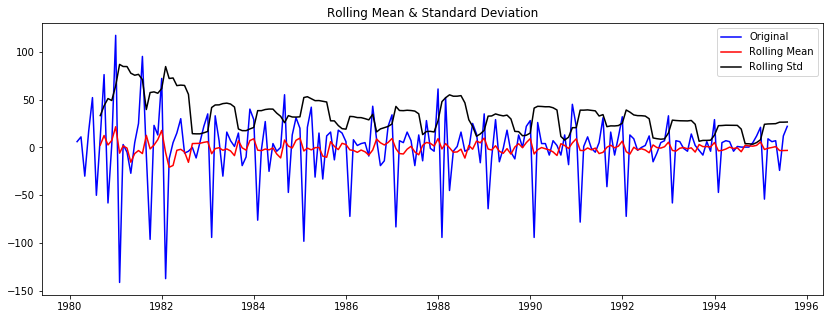

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [202]:
test_stationarity(df['Rose'].diff().dropna())

In [ ]:
#We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data

In [203]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

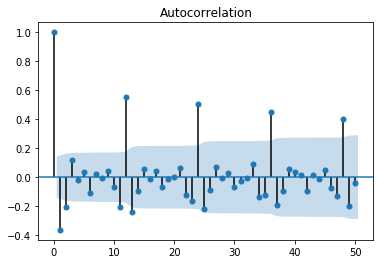

In [204]:
plot_acf(df['Rose'].diff().dropna(),lags=50)
plt.show()

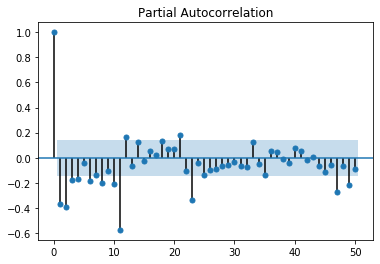

In [205]:
plot_pacf(df['Rose'].diff().dropna(),lags=50)
plt.show()

##### Check for stationarity of the Training Data Time Series

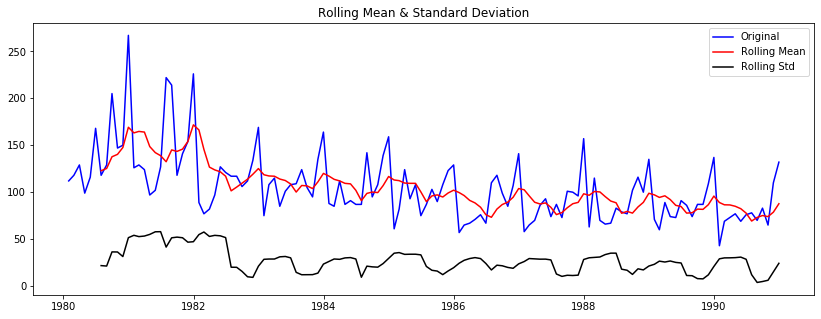

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [206]:
test_stationarity(train['Rose'])

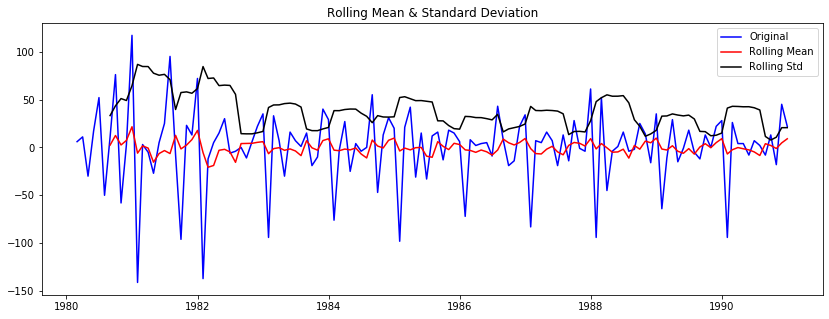

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [207]:
test_stationarity(train['Rose'].diff().dropna())

#### We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05.
Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there
Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [208]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [209]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [79]:
from statsmodels.tsa.arima_model import ARIMA

In [211]:
for param in pdq:
    try:
        ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
        print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
        ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    except:
        continue

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353735869105
ARIMA(1, 1, 0) - AIC:1319.3483105803125
ARIMA(1, 1, 1) - AIC:1277.7757488779507
ARIMA(1, 1, 2) - AIC:1277.3592330926072
ARIMA(1, 1, 3) - AIC:1279.3126334656456


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(1, 1, 4) - AIC:1282.052741489029
ARIMA(2, 1, 0) - AIC:1300.609261174427
ARIMA(2, 1, 1) - AIC:1279.045689409309
ARIMA(2, 1, 2) - AIC:1279.2986939365255
ARIMA(2, 1, 3) - AIC:1281.1962260422408


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARIMA(2, 1, 4) - AIC:1282.4167124914761
ARIMA(3, 1, 0) - AIC:1299.478739154304
ARIMA(3, 1, 1) - AIC:1279.6059658667969
ARIMA(3, 1, 2) - AIC:1280.9692475106217


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 1, 3) - AIC:1273.1941039972075
ARIMA(3, 1, 4) - AIC:1274.3352032735884
ARIMA(4, 1, 0) - AIC:1298.3195533735175
ARIMA(4, 1, 1) - AIC:1281.116324505259


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(4, 1, 2) - AIC:1283.7527278611783


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(4, 1, 3) - AIC:1284.9526869795734


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


In [212]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
16,"(3, 1, 3)",1273.194104
17,"(3, 1, 4)",1274.335203
2,"(0, 1, 2)",1276.835374
5,"(1, 1, 2)",1277.359233
4,"(1, 1, 1)",1277.775749
9,"(2, 1, 1)",1279.045689
10,"(2, 1, 2)",1279.298694
6,"(1, 1, 3)",1279.312633
14,"(3, 1, 1)",1279.605966
1,"(0, 1, 1)",1280.726183


In [221]:
mod = ARIMA(train['Rose'], order=(3,1,3),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sun, 26 Jul 2020   AIC                           1273.194
Time:                        22:50:40   BIC                           1296.196
Sample:                    02-29-1980   HQIC                          1282.541
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7242      0.086     -8.401      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.33

#### Predict on the Test Set using this model and evaluate the model.

In [222]:
predicted_arima = results_Arima.forecast(steps=len(test))

In [223]:
test_rmse_arima = mean_squared_error(test['Rose'],predicted_arima[0],squared=False)
test_mape_arima= MAPE(test['Rose'],predicted_arima[0])
print("Test rmse for arima is ",test_rmse_arima)
print("Test mape for arima is ",test_mape_arima)

Test rmse for arima is  15.987584247195567
Test mape for arima is  26.09


In [224]:
resultsDf_9 = pd.DataFrame({'Test RMSE': test_rmse_arima,'Test MAPE':test_mape_arima}
                           ,index=['Arima 3,1,3'])
resultsDf_9

,Test RMSE,Test MAPE
"Arima 3,1,3",15.987584,26.09


In [217]:
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796242,63.88
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",70.572452,120.25
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",16.447465,22.88


#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [221]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [223]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [224]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        try:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
            SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        except:
            continue

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207484
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380877


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(0, 0, 3, 12)7 - AIC:3891.4574126214325
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869386836
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635753085


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697554
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945827


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 3, 12)7 - AIC:3957.990213117098
SARIMA(0, 1, 0)x(3, 0, 0, 12)7 - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12)7 - AIC:851.7482702719051
SARIMA(0, 1, 0)x(3, 0, 2, 12)7 - AIC:850.5304136127369


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(3, 0, 3, 12)7 - AIC:4257.90145524532
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.5554825918332
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:923.6314049383755


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(0, 0, 3, 12)7 - AIC:3822.5912833032407
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1095.7936324918244
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.7434330946082
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:918.8573483303601


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:914.5982866535918
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:915.3332430461658
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:901.1988290990013


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 0, 3, 12)7 - AIC:3705.32171997975
SARIMA(0, 1, 1)x(3, 0, 0, 12)7 - AIC:798.5889764821077
SARIMA(0, 1, 1)x(3, 0, 1, 12)7 - AIC:800.4844931623414
SARIMA(0, 1, 1)x(3, 0, 2, 12)7 - AIC:801.0595269281702


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(3, 0, 3, 12)7 - AIC:3682.9427328080164
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:1251.6675430541038
SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:1083.486697526493
SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:913.4938486617701


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(0, 0, 3, 12)7 - AIC:3354.1015877789355
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:1088.8332843414155
SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:1045.5400933552442
SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:904.83109136398


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:913.0105912257985
SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:914.1707545029554
SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:887.9375085680414


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 0, 3, 12)7 - AIC:2261.0402947311886
SARIMA(0, 1, 2)x(3, 0, 0, 12)7 - AIC:800.1020189374583
SARIMA(0, 1, 2)x(3, 0, 1, 12)7 - AIC:801.9941080530058
SARIMA(0, 1, 2)x(3, 0, 2, 12)7 - AIC:802.5206528341516


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(3, 0, 3, 12)7 - AIC:2675.029154175204
SARIMA(0, 1, 3)x(0, 0, 0, 12)7 - AIC:1243.9501216739036
SARIMA(0, 1, 3)x(0, 0, 1, 12)7 - AIC:1076.7632646079205
SARIMA(0, 1, 3)x(0, 0, 2, 12)7 - AIC:905.692653338097


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(0, 0, 3, 12)7 - AIC:3685.3115008293807
SARIMA(0, 1, 3)x(1, 0, 0, 12)7 - AIC:1089.2051361212325
SARIMA(0, 1, 3)x(1, 0, 1, 12)7 - AIC:1034.8411212936812
SARIMA(0, 1, 3)x(1, 0, 2, 12)7 - AIC:896.8362523342473


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(0, 1, 3)x(2, 0, 0, 12)7 - AIC:914.9477108987111
SARIMA(0, 1, 3)x(2, 0, 1, 12)7 - AIC:916.0630996886174
SARIMA(0, 1, 3)x(2, 0, 2, 12)7 - AIC:880.550978825286


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(2, 0, 3, 12)7 - AIC:3658.05057322637
SARIMA(0, 1, 3)x(3, 0, 0, 12)7 - AIC:802.0987124784614
SARIMA(0, 1, 3)x(3, 0, 1, 12)7 - AIC:803.9928772256408
SARIMA(0, 1, 3)x(3, 0, 2, 12)7 - AIC:804.5150730347032


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(3, 0, 3, 12)7 - AIC:3647.7685240796177
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:1135.2955447585719
SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:963.940539125769


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(0, 0, 3, 12)7 - AIC:3217.108100502231
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:1124.8860786804557
SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:1105.4080055024747
SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:958.5001972948003


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:939.098477866384
SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:940.908713366107
SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:942.297310307086


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(2, 0, 3, 12)7 - AIC:3535.359121643183
SARIMA(1, 1, 0)x(3, 0, 0, 12)7 - AIC:819.3931032272833
SARIMA(1, 1, 0)x(3, 0, 1, 12)7 - AIC:821.1501371573592
SARIMA(1, 1, 0)x(3, 0, 2, 12)7 - AIC:819.1305086846762


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(3, 0, 3, 12)7 - AIC:3513.7621956214252
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:1262.1840064255507
SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:1094.3172708640798
SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:923.0862224063887
SARIMA(1, 1, 1)x(0, 0, 3, 12)7 - AIC:3928.230050703927
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:1083.3937965031942
SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.7180547134699
SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:916.354942850357


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:905.92490608419
SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:907.297286747082
SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:900.6725795936935
SARIMA(1, 1, 1)x(2, 0, 3, 12)7 - AIC:3810.916083247369
SARIMA(1, 1, 1)x(3, 0, 0, 12)7 - AIC:789.2360439389502
SARIMA(1, 1, 1)x(3, 0, 1, 12)7 - AIC:790.96034478547
SARIMA(1, 1, 1)x(3, 0, 2, 12)7 - AIC:790.8113850225518
SARIMA(1, 1, 1)x(3, 0, 3, 12)7 - AIC:3788.5341885415082
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:1251.94950407063
SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:1085.4861928101088
SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:915.4938402421758


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(0, 0, 3, 12)7 - AIC:3541.9255708415258
SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:1090.7760924450708
SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:1042.6183213683041
SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:906.7318500287658


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:906.1690196793622
SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:907.4597827872758
SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:889.9021457559716


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 3, 12)7 - AIC:3699.0299592934057
SARIMA(1, 1, 2)x(3, 0, 0, 12)7 - AIC:791.0073801497606
SARIMA(1, 1, 2)x(3, 0, 1, 12)7 - AIC:792.6312809933215
SARIMA(1, 1, 2)x(3, 0, 2, 12)7 - AIC:792.1390248251876


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(3, 0, 3, 12)7 - AIC:3676.842447647575
SARIMA(1, 1, 3)x(0, 0, 0, 12)7 - AIC:1245.5463125316237
SARIMA(1, 1, 3)x(0, 0, 1, 12)7 - AIC:1072.98497391736
SARIMA(1, 1, 3)x(0, 0, 2, 12)7 - AIC:907.4130105116966


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(0, 0, 3, 12)7 - AIC:3556.1409790542843
SARIMA(1, 1, 3)x(1, 0, 0, 12)7 - AIC:1082.328148767602
SARIMA(1, 1, 3)x(1, 0, 1, 12)7 - AIC:1036.1950929106442
SARIMA(1, 1, 3)x(1, 0, 2, 12)7 - AIC:897.5232291623639


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(1, 1, 3)x(2, 0, 0, 12)7 - AIC:908.2687612841657
SARIMA(1, 1, 3)x(2, 0, 1, 12)7 - AIC:909.7955658754919
SARIMA(1, 1, 3)x(2, 0, 2, 12)7 - AIC:880.288658643004


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(2, 0, 3, 12)7 - AIC:2235.453320074594
SARIMA(1, 1, 3)x(3, 0, 0, 12)7 - AIC:792.9903134238177
SARIMA(1, 1, 3)x(3, 0, 1, 12)7 - AIC:794.6310162482072
SARIMA(1, 1, 3)x(3, 0, 2, 12)7 - AIC:794.046792414858


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(3, 0, 3, 12)7 - AIC:2655.5700717821164
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:1128.7773704710978
SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:958.079320882995


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(0, 0, 3, 12)7 - AIC:3898.7690573319533
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:1099.508602157594
SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:1076.7863198641217
SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:951.1988165559325


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:924.6004792645429
SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:925.9757801384793
SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:927.8380693280818
SARIMA(2, 1, 0)x(2, 0, 3, 12)7 - AIC:3851.721632525875
SARIMA(2, 1, 0)x(3, 0, 0, 12)7 - AIC:806.0536407408738
SARIMA(2, 1, 0)x(3, 0, 1, 12)7 - AIC:808.0472637903329
SARIMA(2, 1, 0)x(3, 0, 2, 12)7 - AIC:806.4988191370436


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(3, 0, 3, 12)7 - AIC:4046.0910012460554
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.2315231800167
SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:1094.209349194942
SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:922.9408472077411


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(0, 0, 3, 12)7 - AIC:3813.118208932553
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:1071.424960110127
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:1052.9244471207892
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:916.2424912822738


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:896.5181608039705
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:897.6399565369395
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:899.4835866284487


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 0, 3, 12)7 - AIC:3799.682256270431
SARIMA(2, 1, 1)x(3, 0, 0, 12)7 - AIC:785.3932600266174
SARIMA(2, 1, 1)x(3, 0, 1, 12)7 - AIC:787.3639259091843
SARIMA(2, 1, 1)x(3, 0, 2, 12)7 - AIC:787.059888756484


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(3, 0, 3, 12)7 - AIC:3785.337071393703
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:1253.9102116146687
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:1085.964355259821
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:916.3258311105169


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 0, 3, 12)7 - AIC:2664.025487047193
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1073.2912713702283
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1044.1909353375177
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:907.6661488812231


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:897.3464439911958
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:898.3781891889461
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:890.6687980923202


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 3, 12)7 - AIC:3170.419619639234
SARIMA(2, 1, 2)x(3, 0, 0, 12)7 - AIC:785.119971255685
SARIMA(2, 1, 2)x(3, 0, 1, 12)7 - AIC:786.9410035453359
SARIMA(2, 1, 2)x(3, 0, 2, 12)7 - AIC:786.9640492242349
SARIMA(2, 1, 2)x(3, 0, 3, 12)7 - AIC:3450.5159606855173
SARIMA(2, 1, 3)x(0, 0, 0, 12)7 - AIC:1237.870281512563
SARIMA(2, 1, 3)x(0, 0, 1, 12)7 - AIC:1067.8073350782838
SARIMA(2, 1, 3)x(0, 0, 2, 12)7 - AIC:908.3349287217527


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(0, 0, 3, 12)7 - AIC:3811.224026313338
SARIMA(2, 1, 3)x(1, 0, 0, 12)7 - AIC:1073.256325730252
SARIMA(2, 1, 3)x(1, 0, 1, 12)7 - AIC:1024.04619701844
SARIMA(2, 1, 3)x(1, 0, 2, 12)7 - AIC:890.9483346686674


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(2, 1, 3)x(2, 0, 0, 12)7 - AIC:893.3579301555608
SARIMA(2, 1, 3)x(2, 0, 1, 12)7 - AIC:903.2328070467177
SARIMA(2, 1, 3)x(2, 0, 2, 12)7 - AIC:879.2191799316633


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(2, 0, 3, 12)7 - AIC:3717.513634381493
SARIMA(2, 1, 3)x(3, 0, 0, 12)7 - AIC:782.4074207809397
SARIMA(2, 1, 3)x(3, 0, 1, 12)7 - AIC:783.4101481574455
SARIMA(2, 1, 3)x(3, 0, 2, 12)7 - AIC:781.0452524166104


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(3, 0, 3, 12)7 - AIC:3711.3421410753513
SARIMA(3, 1, 0)x(0, 0, 0, 12)7 - AIC:1269.8130062641505
SARIMA(3, 1, 0)x(0, 0, 1, 12)7 - AIC:1119.1703158042217
SARIMA(3, 1, 0)x(0, 0, 2, 12)7 - AIC:953.3440589118021


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 0)x(0, 0, 3, 12)7 - AIC:2851.134065710473
SARIMA(3, 1, 0)x(1, 0, 0, 12)7 - AIC:1080.5468456725423
SARIMA(3, 1, 0)x(1, 0, 1, 12)7 - AIC:1065.556972678361
SARIMA(3, 1, 0)x(1, 0, 2, 12)7 - AIC:943.6865996304849


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 0)x(1, 0, 3, 12)7 - AIC:6499.873736750067
SARIMA(3, 1, 0)x(2, 0, 0, 12)7 - AIC:909.7203197940858
SARIMA(3, 1, 0)x(2, 0, 1, 12)7 - AIC:911.0620713976512
SARIMA(3, 1, 0)x(2, 0, 2, 12)7 - AIC:913.0438816472879
SARIMA(3, 1, 0)x(2, 0, 3, 12)7 - AIC:3853.7216325258737
SARIMA(3, 1, 0)x(3, 0, 0, 12)7 - AIC:796.0564701527467
SARIMA(3, 1, 0)x(3, 0, 1, 12)7 - AIC:795.541016766187
SARIMA(3, 1, 0)x(3, 0, 2, 12)7 - AIC:794.6677017145611


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 0)x(3, 0, 3, 12)7 - AIC:3664.6624029176414
SARIMA(3, 1, 1)x(0, 0, 0, 12)7 - AIC:1255.0658180709418
SARIMA(3, 1, 1)x(0, 0, 1, 12)7 - AIC:1095.6894641222393
SARIMA(3, 1, 1)x(0, 0, 2, 12)7 - AIC:923.8872427547399


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(0, 0, 3, 12)7 - AIC:3301.1824564814924
SARIMA(3, 1, 1)x(1, 0, 0, 12)7 - AIC:1064.6149136513557
SARIMA(3, 1, 1)x(1, 0, 1, 12)7 - AIC:1046.0837554122988
SARIMA(3, 1, 1)x(1, 0, 2, 12)7 - AIC:917.0308009384258


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 1)x(2, 0, 0, 12)7 - AIC:887.320445989934
SARIMA(3, 1, 1)x(2, 0, 1, 12)7 - AIC:888.3279208537864
SARIMA(3, 1, 1)x(2, 0, 2, 12)7 - AIC:890.1571522291232


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(2, 0, 3, 12)7 - AIC:3801.591972443835
SARIMA(3, 1, 1)x(3, 0, 0, 12)7 - AIC:775.4266990363151
SARIMA(3, 1, 1)x(3, 0, 1, 12)7 - AIC:775.4953300788045
SARIMA(3, 1, 1)x(3, 0, 2, 12)7 - AIC:774.4002850024184


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(3, 0, 3, 12)7 - AIC:3902.019118379102
SARIMA(3, 1, 2)x(0, 0, 0, 12)7 - AIC:1255.983565229622
SARIMA(3, 1, 2)x(0, 0, 1, 12)7 - AIC:1086.70924096712
SARIMA(3, 1, 2)x(0, 0, 2, 12)7 - AIC:917.7980113456118
SARIMA(3, 1, 2)x(0, 0, 3, 12)7 - AIC:6996.649051258474
SARIMA(3, 1, 2)x(1, 0, 0, 12)7 - AIC:1066.2776211409007
SARIMA(3, 1, 2)x(1, 0, 1, 12)7 - AIC:1046.1260517297465
SARIMA(3, 1, 2)x(1, 0, 2, 12)7 - AIC:909.2875091292444


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 2)x(2, 0, 0, 12)7 - AIC:889.3182633514109
SARIMA(3, 1, 2)x(2, 0, 1, 12)7 - AIC:890.3277441212672
SARIMA(3, 1, 2)x(2, 0, 2, 12)7 - AIC:896.1452358147033


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(2, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 2)x(3, 0, 0, 12)7 - AIC:777.2505637836089
SARIMA(3, 1, 2)x(3, 0, 1, 12)7 - AIC:776.346215889331
SARIMA(3, 1, 2)x(3, 0, 2, 12)7 - AIC:774.8809356628348


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(3, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 3)x(0, 0, 0, 12)7 - AIC:1243.738593081785
SARIMA(3, 1, 3)x(0, 0, 1, 12)7 - AIC:1060.5397667348768
SARIMA(3, 1, 3)x(0, 0, 2, 12)7 - AIC:910.3340155317218
SARIMA(3, 1, 3)x(0, 0, 3, 12)7 - AIC:3739.8159509170964
SARIMA(3, 1, 3)x(1, 0, 0, 12)7 - AIC:1066.8462841815822
SARIMA(3, 1, 3)x(1, 0, 1, 12)7 - AIC:1039.7662380501965
SARIMA(3, 1, 3)x(1, 0, 2, 12)7 - AIC:900.0483662883754


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 3)x(2, 0, 0, 12)7 - AIC:884.0463711785746
SARIMA(3, 1, 3)x(2, 0, 1, 12)7 - AIC:885.9217104172958
SARIMA(3, 1, 3)x(2, 0, 2, 12)7 - AIC:880.5595714951385


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(2, 0, 3, 12)7 - AIC:3449.658315083667
SARIMA(3, 1, 3)x(3, 0, 0, 12)7 - AIC:775.561018493722
SARIMA(3, 1, 3)x(3, 0, 1, 12)7 - AIC:776.3690406371668
SARIMA(3, 1, 3)x(3, 0, 2, 12)7 - AIC:778.2316167580789


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(3, 0, 3, 12)7 - AIC:3430.0619133960586


In [192]:
SARIMA_AIC.sort_values(by=['AIC']).head()  #1555.584247

NameError: name 'SARIMA_AIC' is not defined

In [226]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, 2, 12)   Log Likelihood                -377.200
Date:                            Sat, 25 Jul 2020   AIC                            774.400
Time:                                    02:26:02   BIC                            799.618
Sample:                                         0   HQIC                           784.578
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0.294
ar.L2         -0.0060      0.120   

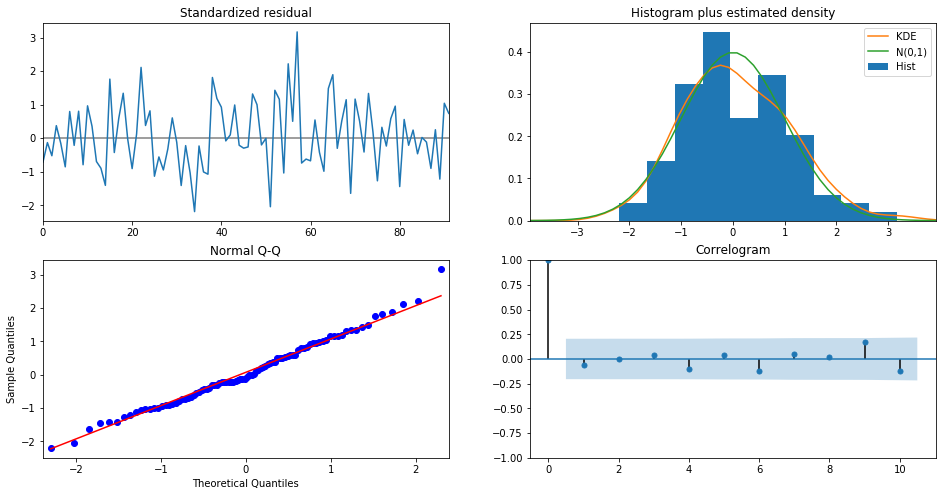

In [227]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [228]:
pred_test_SARIMA = results_SARIMA.get_forecast(steps=len(test))
pred_test_SARIMA.predicted_mean

array([ 55.23518937,  68.12315343,  67.90869931,  66.78618505,
        69.76003018,  70.32874972,  75.3593598 ,  76.49172815,
        78.97162462,  76.53877212,  93.24916043, 116.28369993,
        55.2022421 ,  64.44403731,  68.54761633,  63.87219579,
        67.69982553,  68.44352978,  72.97198243,  74.32494828,
        75.31810579,  76.04702387,  87.42142495, 109.80783256,
        51.29789492,  62.61693699,  65.91187274,  62.26424208,
        64.61180295,  65.74749136,  69.82616031,  70.41949254,
        72.33191815,  71.3656635 ,  84.72249851, 105.35849732,
        49.94952337,  60.31164858,  63.15794997,  59.89674931,
        62.22759821,  63.19896375,  67.06106048,  67.71039353,
        69.43511481,  68.58127386,  80.95555376, 100.27553272,
        48.59032562,  58.12910332,  60.87867626,  57.74093903,
        59.99709339,  60.88862585,  64.51091414])

In [230]:
rmse_test_SARIMA = mean_squared_error(test['Rose'],pred_test_SARIMA.predicted_mean,squared=False)
print(rmse_test_SARIMA)

18.88195596145379


In [231]:
test_rmse_sarima = mean_squared_error(test['Rose'],pred_test_SARIMA.predicted_mean,squared=False)
test_mape_sarima= MAPE(test['Rose'],pred_test_SARIMA.predicted_mean)
print("Test rmse for sarima is ",test_rmse_sarima)
print("Test mape for sarima is ",test_mape_sarima)

Test rmse for sarima is  18.88195596145379
Test mape for sarima is  32.02


In [232]:
resultsDf_10 = pd.DataFrame({'Test RMSE': test_rmse_sarima,'Test MAPE':test_mape_sarima}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])
resultsDf_10

,Test RMSE,Test MAPE
"SARIMA(3, 1, 1)(3, 0, 2, 12)",18.881956,32.02


In [233]:
resultsDf = pd.concat([resultsDf,resultsDf_10])

resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796242,63.88
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",70.572452,120.25
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",16.447465,22.88


### ARIMA/SARIMA models based on the cut-off points of ACF and PACF

In [108]:
mod_new = ARIMA(train['Rose'], order=(3,1,3),freq='M') 
results_Arima_new = mod_new.fit()
print(results_Arima_new.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sun, 26 Jul 2020   AIC                           1273.194
Time:                        14:45:51   BIC                           1296.196
Sample:                    02-29-1980   HQIC                          1282.541
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7242      0.086     -8.401      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.33

In [225]:
predicted_arima_new = results_Arima_new.forecast(steps=len(test))

test_rmse_arima_new = mean_squared_error(test['Rose'],predicted_arima_new[0],squared=False)
test_mape_arima_new= MAPE(test['Rose'],predicted_arima_new[0])
print("Test rmse for arima is ",test_rmse_arima_new)
print("Test mape for arima is ",test_mape_arima_new)

resultsDf_11 = pd.DataFrame({'Test RMSE': test_rmse_arima_new,'Test MAPE':test_mape_arima_new}
                           ,index=['Arima 3,1,3'])
resultsDf_11



Test rmse for arima is  15.987584247195567
Test mape for arima is  26.09


,Test RMSE,Test MAPE
"Arima 3,1,3",15.987584,26.09


In [226]:
resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796242,63.88
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",70.572452,120.25
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",16.447465,22.88


In [115]:
import statsmodels.api as sm

mod_sar = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 4),
                                seasonal_order=(4, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_new = mod_sar.fit(maxiter=1000)
print(results_SARIMA_new.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 4)x(4, 0, 2, 12)   Log Likelihood                -321.321
Date:                            Sun, 26 Jul 2020   AIC                            672.641
Time:                                    14:56:19   BIC                            708.183
Sample:                                         0   HQIC                           686.880
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1231      0.223      0.551      0.582      -0.315       0.561
ar.L2          0.0845      0.248   

In [117]:
pred_test_SARIMA_new = results_SARIMA_new.get_forecast(steps=len(test))
test_rmse_sarima_new = mean_squared_error(test['Rose'],pred_test_SARIMA_new.predicted_mean,squared=False)
test_mape_sarima_new= MAPE(test['Rose'],pred_test_SARIMA_new.predicted_mean)
print("Test rmse for sarima is ",test_rmse_sarima_new)
print("Test mape for sarima is ",test_mape_sarima_new)

resultsDf_10 = pd.DataFrame({'Test RMSE': test_rmse_sarima_new,'Test MAPE':test_mape_sarima_new}
                           ,index=['SARIMA(4, 1, 4)(4, 0, 2, 12)'])
resultsDf_10



Test rmse for sarima is  17.27455645824444
Test mape for sarima is  27.66


,Test RMSE,Test MAPE
"SARIMA(4, 1, 4)(4, 0, 2, 12)",17.274556,27.66


In [227]:
resultsDf = pd.concat([resultsDf,resultsDf_10])

resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796242,63.88
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",70.572452,120.25
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",16.447465,22.88


In [228]:
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
"Alpha=1,SimpleExponentialSmoothing",36.796242,63.88
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",70.572452,120.25
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",16.447465,22.88


### Best Model

In [229]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')

Sorted by RMSE values on the Test Data: 
                                                     Test RMSE  Test MAPE
2pointTrailingMovingAverage                         11.529278      13.54
Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialS...  13.635929      18.68
4pointTrailingMovingAverage                         14.451403      19.49
6pointTrailingMovingAverage                         14.566327      20.82
9pointTrailingMovingAverage                         14.727630      21.01
RegressionOnTime                                    15.268955      22.82
Arima 3,1,3                                         15.987584      26.09
Alpha=0.1334,Beta=0.0137,Gamma=0,TripleExponent...  16.447465      22.88
Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponent...  16.447465      22.88
SARIMA(4, 1, 4)(4, 0, 2, 12)                        17.274556      27.66
Alpha=1,SimpleExponentialSmoothing                  36.796242      63.88
Alpha=0.0987,SimpleExponentialSmoothing             36.796242      63.88
Alpha=1,S

### Although we are seeing that the best model as per RMSE is the 2pointTrailingMovingAverage as it is giving us the least RMSE value. But the moving average models are actually quite a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. Hence we will going to choose the second best model which comes out to be Triple Exponential Model. Its RMSE value is very close to the 2pointTrailingMovingAverage value hence we can choose this model as well.

In [248]:
fullmodel1 = ExponentialSmoothing(df['Rose'].astype("double"),trend='additive',seasonal='additive',freq='M').fit(
    smoothing_level=0.1,smoothing_slope=0.4,smoothing_seasonal=0.3)


In [250]:
RMSE_fullmodel1 = mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(df['Rose'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 21.46672055265007 
MAPE: 15.79


In [251]:
# Getting the predictions for the 12 months
prediction_1 = fullmodel1.forecast(steps=12)

In [252]:
prediction_1

1995-08-31    46.575527
1995-09-30    48.269060
1995-10-31    50.626930
1995-11-30    60.814961
1995-12-31    90.138697
1996-01-31    29.882066
1996-02-29    39.051196
1996-03-31    46.173430
1996-04-30    48.615066
1996-05-31    39.333386
1996-06-30    47.295411
1996-07-31    56.034468
Freq: M, dtype: float64

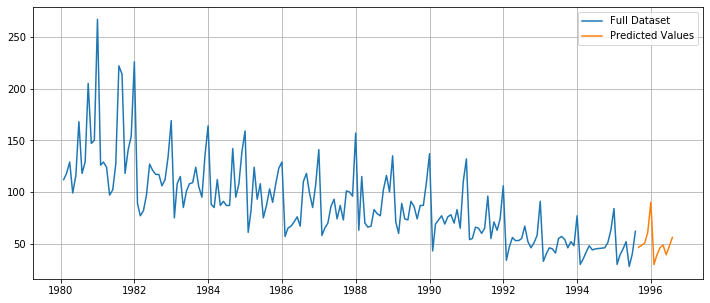

In [254]:
plt.figure(figsize=(12,5))
plt.plot(df['Rose'],label='Full Dataset')
plt.plot(prediction_1,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

In [255]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,14.171950,46.575527,128.650196
1995-09-30,15.865484,48.269060,130.343730
1995-10-31,18.223354,50.626930,132.701599
1995-11-30,28.411385,60.814961,142.889631
1995-12-31,57.735121,90.138697,172.213366


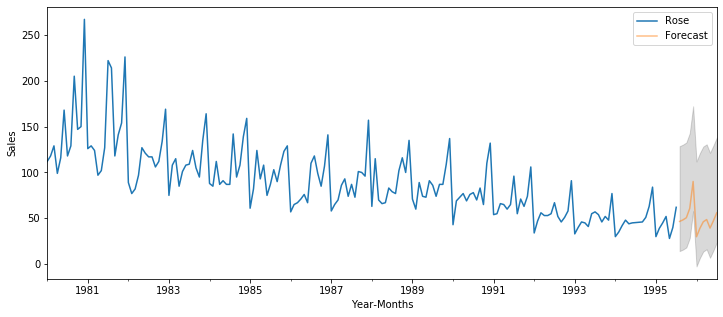

In [256]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(12,5))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

### 

In [ ]:
	Triple Exponential Model is performing best in this case giving us the least error
	Looking at the bar plot, we can see that on December months the sales are highest. We can use this insights to increase our sales further. We can introduce certain offers in November, December months to attract more customers.
	On Monday mean sales of the wine is highest. We can give certain offers to attract more customers
	Year 1981 has the highest sales recorded till data. We can go back to find out the reasons to which pushed the sales so much.
	Looking at the prediction, we can say that the sales figure are declining each and every year.The reason behind this may be either deterioration in quality or arrival of any rival product in the market .Hence some important measures have to be taken to identify the reason and tale appropriate measures to increase the trend. 
